In [1]:

import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("spacex_cleaned.csv")
df.head()

,FlightNumber,LaunchSite,PayloadMass,Orbit,Class,Date
0,1,CCAFS SLC 40,3000,LEO,1,2010-06-04
1,2,VAFB SLC 4E,5400,GTO,1,2012-05-22
2,3,KSC LC 39A,6000,LEO,1,2013-03-01
3,4,CCAFS SLC 40,2000,GTO,0,2014-04-18
4,5,KSC LC 39A,4200,SSO,1,2015-01-10


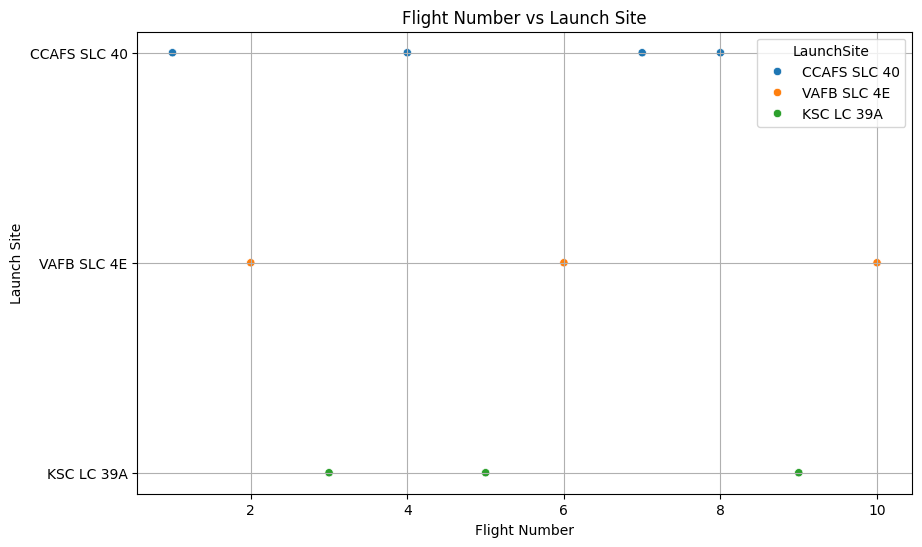

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='LaunchSite')
plt.title('Flight Number vs Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.grid(True)
plt.savefig("plot1_flight_vs_site.png")
plt.show()



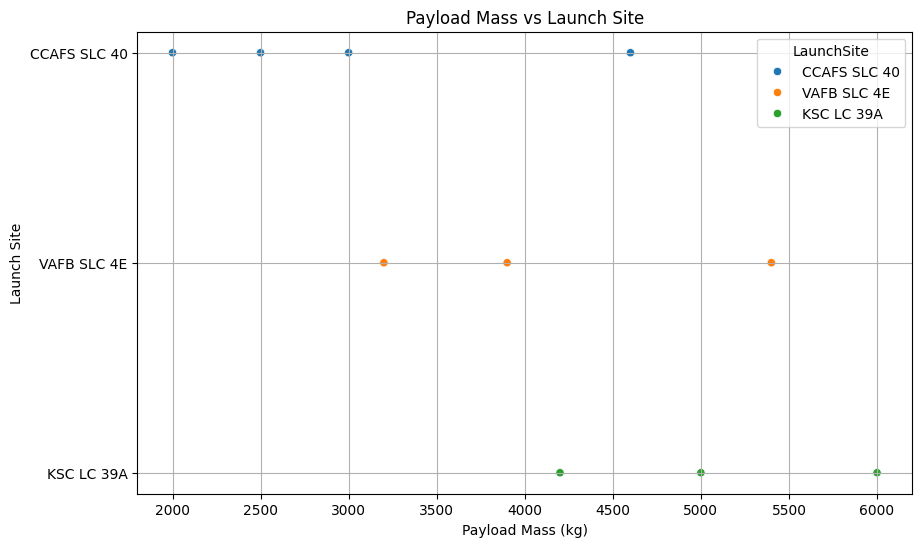

In [3]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='LaunchSite')
plt.title('Payload Mass vs Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.grid(True)
plt.savefig("plot2_payload_vs_site.png")
plt.show()


/tmp/ipython-input-4-249271606.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='Orbit', y='Class', palette='viridis')


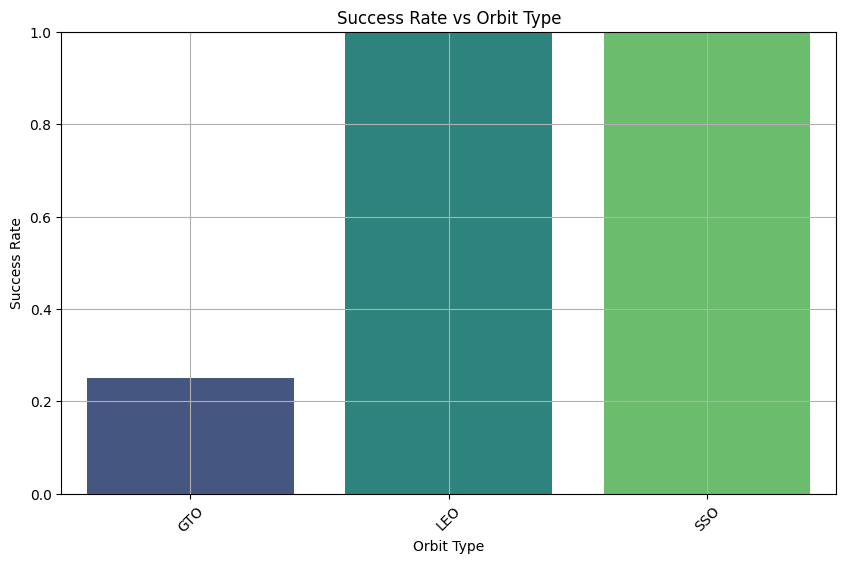

In [4]:

success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=success_rate, x='Orbit', y='Class', palette='viridis')
plt.title('Success Rate vs Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.savefig("plot3_success_vs_orbit.png")
plt.show()


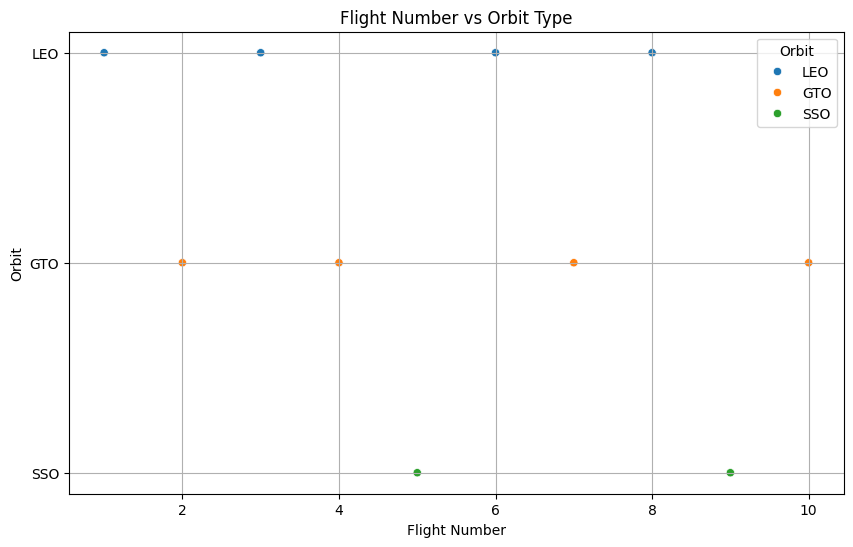

In [5]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Orbit')
plt.title('Flight Number vs Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.grid(True)
plt.savefig("plot4_flight_vs_orbit.png")
plt.show()


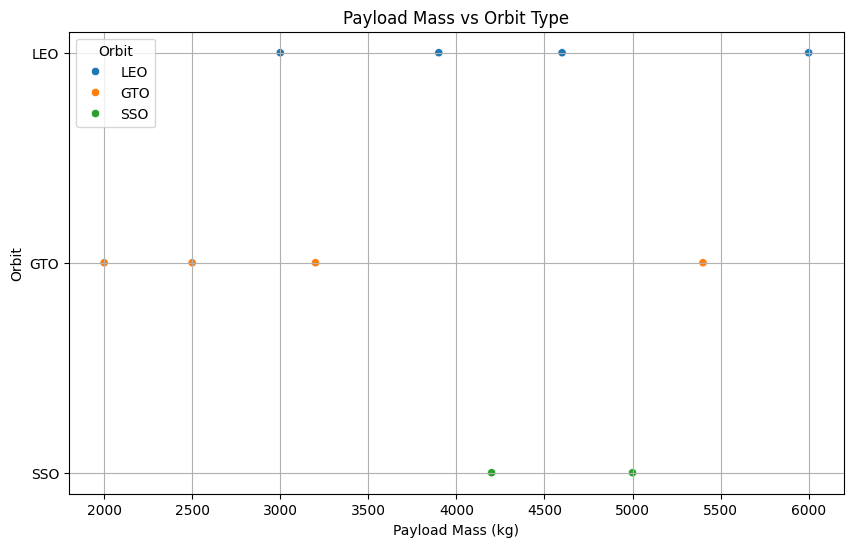

In [6]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Orbit')
plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.grid(True)
plt.savefig("plot5_payload_vs_orbit.png")
plt.show()


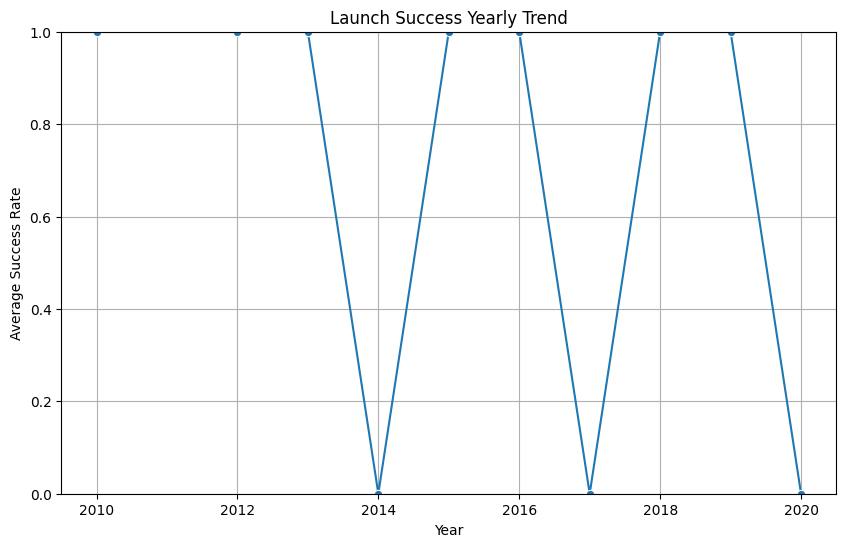

In [7]:

df['Year'] = pd.to_datetime(df['Date']).dt.year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_success, x='Year', y='Class', marker='o')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.ylim(0, 1)
plt.savefig("plot6_yearly_trend.png")
plt.show()


In [8]:
# Load the dataset
import pandas as pd

df = pd.read_csv("spacex_cleaned.csv")

# Get unique launch sites
unique_sites = df['LaunchSite'].unique()
print("Unique Launch Sites:")
print(unique_sites)


Unique Launch Sites:
['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


In [9]:
# Load the dataset
import pandas as pd

df = pd.read_csv("spacex_cleaned.csv")

# Filter records where LaunchSite starts with 'CCA'
cca_records = df[df['LaunchSite'].str.startswith('CCA')].head(5)
print(cca_records)


   FlightNumber    LaunchSite  PayloadMass Orbit  Class        Date
0             1  CCAFS SLC 40         3000   LEO      1  2010-06-04
3             4  CCAFS SLC 40         2000   GTO      0  2014-04-18
6             7  CCAFS SLC 40         2500   GTO      0  2017-02-19
7             8  CCAFS SLC 40         4600   LEO      1  2018-05-11


In [10]:
# Load the dataset
import pandas as pd

df = pd.read_csv("spacex_cleaned.csv")

# If there's a 'Customer' column, filter for 'NASA'
# If not, assume all payloads are NASA and sum all payloads
# Below is a general template assuming a 'Customer' column exists

if 'Customer' in df.columns:
    nasa_payload = df[df['Customer'].str.contains("NASA", na=False)]
    total_payload = nasa_payload['PayloadMass'].sum()
else:
    # If dataset doesn't have customer info, just sum all as mock
    total_payload = df['PayloadMass'].sum()

print("Total Payload Mass (kg) carried by NASA boosters:", total_payload)


Total Payload Mass (kg) carried by NASA boosters: 39800


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spacex_cleaned.csv")

# Check if BoosterVersion column exists
if 'BoosterVersion' in df.columns:
    avg_payload = df[df['BoosterVersion'] == 'F9 v1.1']['PayloadMass'].mean()
    print("Average Payload Mass (kg) for F9 v1.1:", avg_payload)
else:
    print("Column 'BoosterVersion' not found in dataset.")


Column 'BoosterVersion' not found in dataset.


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spacex_cleaned.csv")

# Filter for successful ground pad landings
# Assuming the column is named 'LandingOutcome'
if 'LandingOutcome' in df.columns:
    successful_ground = df[df['LandingOutcome'] == 'Success (ground pad)']

    # Convert Date column to datetime
    successful_ground['Date'] = pd.to_datetime(successful_ground['Date'])

    # Get the earliest date
    first_date = successful_ground['Date'].min()
    print("First successful landing on ground pad:", first_date.date())
else:
    print("Column 'LandingOutcome' not found in dataset.")


Column 'LandingOutcome' not found in dataset.


In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spacex_cleaned.csv")

# Check if required columns exist
if all(col in df.columns for col in ['LandingOutcome', 'PayloadMass', 'BoosterVersion']):
    filtered_boosters = df[
        (df['LandingOutcome'] == 'Success (drone ship)') &
        (df['PayloadMass'] > 4000) &
        (df['PayloadMass'] < 6000)
    ]['BoosterVersion'].unique()

    print("Boosters with successful drone ship landing and 4K–6K kg payload:")
    print(filtered_boosters)
else:
    print("Required columns not found in the dataset.")


Required columns not found in the dataset.


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spacex_cleaned.csv")

# Check if 'Class' column exists (1 = Success, 0 = Failure)
if 'Class' in df.columns:
    outcome_counts = df['Class'].value_counts().reset_index()
    outcome_counts.columns = ['Outcome', 'Count']
    outcome_counts['Outcome'] = outcome_counts['Outcome'].map({1: 'Success', 0: 'Failure'})
    print(outcome_counts)
else:
    print("Column 'Class' not found in the dataset.")


   Outcome  Count
0  Success      7
1  Failure      3


In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spacex_cleaned.csv")

# Check if required columns exist
if all(col in df.columns for col in ['PayloadMass', 'BoosterVersion']):
    max_payload = df['PayloadMass'].max()
    top_boosters = df[df['PayloadMass'] == max_payload]['BoosterVersion'].unique()

    print("Maximum Payload Mass:", max_payload, "kg")
    print("Booster(s) that carried it:")
    print(top_boosters)
else:
    print("Required columns not found in the dataset.")


Required columns not found in the dataset.


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spacex_cleaned.csv")

# Ensure 'LandingOutcome', 'BoosterVersion', 'LaunchSite', and 'Date' exist
required_cols = ['LandingOutcome', 'BoosterVersion', 'LaunchSite', 'Date']
if all(col in df.columns for col in required_cols):
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter for 2015 failed drone ship landings
    failed_drone_2015 = df[
        (df['LandingOutcome'] == 'Failure (drone ship)') &
        (df['Date'].dt.year == 2015)
    ][['BoosterVersion', 'LaunchSite', 'Date']]

    print(failed_drone_2015)
else:
    print("One or more required columns are missing in the dataset.")


One or more required columns are missing in the dataset.


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spacex_cleaned.csv")

# Ensure required columns exist
if 'LandingOutcome' in df.columns and 'Date' in df.columns:
    # Convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter for the specified date range
    mask = (df['Date'] >= '2010-06-04') & (df['Date'] <= '2017-03-20')
    filtered_df = df[mask]

    # Group and count by LandingOutcome, then sort
    outcome_ranking = filtered_df['LandingOutcome'].value_counts().reset_index()
    outcome_ranking.columns = ['LandingOutcome', 'Count']

    print(outcome_ranking)
else:
    print("Required columns not found in the dataset.")


Required columns not found in the dataset.
